In [3]:
?lm

lm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which lm is called."
subset,an optional vector specifying a subset of observations to be used in the fitting process.
weights,"an optional vector of weights to be used in the fitting process. Should be NULL or a numeric vector. If non-NULL, weighted least squares is used with weights weights (that is, minimizing sum(w*e^2)); otherwise ordinary least squares is used. See also ‘Details’,"
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
method,"the method to be used; for fitting, currently only method = ""qr"" is supported; method = ""model.frame"" returns the model frame (the same as with model = TRUE, see below)."
"model, x, y, qr","logicals. If TRUE the corresponding components of the fit (the model frame, the model matrix, the response, the QR decomposition) are returned."
singular.ok,logical. If FALSE (the default in S but not in R) a singular fit is an error.
contrasts,an optional list. See the contrasts.arg of model.matrix.default.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector or matrix of extents matching those of the response. One or more offset terms can be included in the formula instead or as well, and if more than one are specified their sum is used. See model.offset."


In [6]:
# ?lm 에서 examples 내용
require(graphics)

## Annette Dobson (1990) "An Introduction to Generalized Linear Models".
## Page 9: Plant Weight Data.
ctl <- c(4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14)
trt <- c(4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69)
group <- gl(2, 10, 20, labels = c("Ctl","Trt"))
weight <- c(ctl, trt)

In [9]:
lm.D9 <- lm(weight ~ group)
lm.D90 <- lm(weight ~ group - 1) # omitting intercept

anova(lm.D9)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,1,0.688205,0.6882050,1.419101,0.2490232
Residuals,18,8.729250,0.4849583,NA,NA


In [10]:
summary(lm.D90)


Call:
lm(formula = weight ~ group - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4938  0.0685  0.2462  1.3690 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
groupCtl   5.0320     0.2202   22.85 9.55e-15 ***
groupTrt   4.6610     0.2202   21.16 3.62e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6964 on 18 degrees of freedom
Multiple R-squared:  0.9818,	Adjusted R-squared:  0.9798 
F-statistic: 485.1 on 2 and 18 DF,  p-value: < 2.2e-16


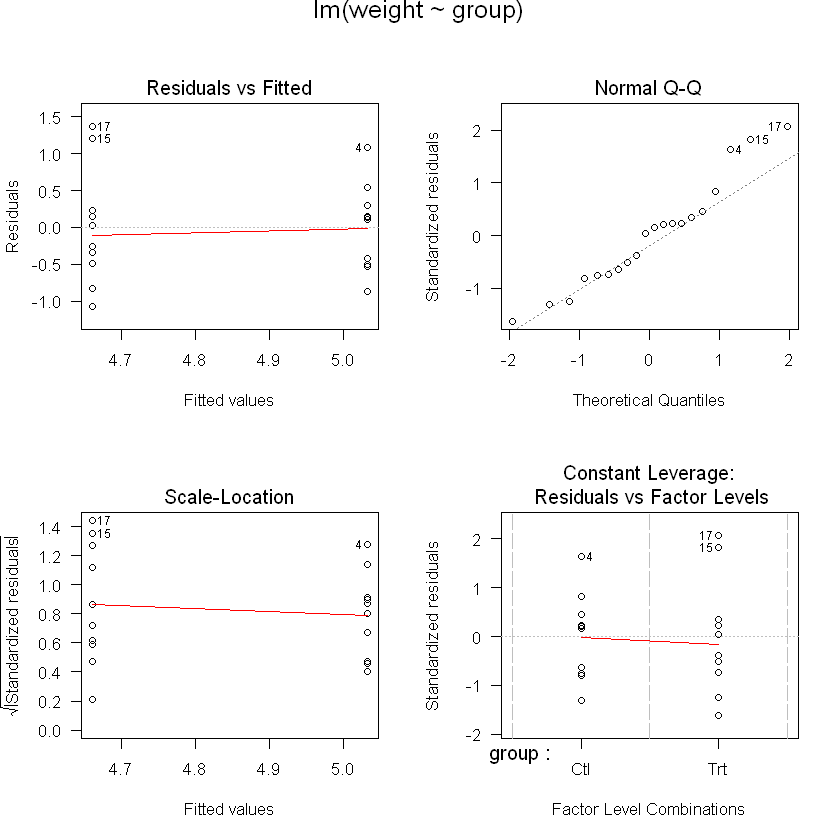

In [16]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(lm.D9, las = 1)      # Residuals, Fitted, ...
par(opar)